In [ ]:
import os
import pickle
import zipfile
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to the zip file in your Google Drive
zip_file_path = '/content/drive/MyDrive/ML_FinalProject/Image_Captioning_Dataset.zip'

# Destination directory for extracting the zip file
extracted_dir_path = '/content/extracted/'

# Create the destination directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# List the extracted files
extracted_files = os.listdir(extracted_dir_path)
print("Files extracted successfully:", extracted_files)

Files extracted successfully: ['Image_Captioning_Dataset', '__MACOSX']


In [ ]:
# Path to the extracted directory
extracted_dir_path = '/content/extracted/Image_Captioning_Dataset'

# List to store file paths
file_paths = []

# Walk through the directory structure and collect file paths
for root, dirs, files in os.walk(extracted_dir_path):
    for file in files:
        file_paths.append(os.path.join(root, file))

# Display the collected file paths
for file_path in file_paths:
    print(file_path)

Streaming output truncated to the last 5000 lines.
/content/extracted/Image_Captioning_Dataset/390986651_c801db91a0.jpg
/content/extracted/Image_Captioning_Dataset/2337377811_8c81b40a64.jpg
/content/extracted/Image_Captioning_Dataset/2572101672_4d699c8713.jpg
/content/extracted/Image_Captioning_Dataset/2884420269_225d27f242.jpg
/content/extracted/Image_Captioning_Dataset/3279228339_71deaa3d9b.jpg
/content/extracted/Image_Captioning_Dataset/222878446_32c6fc4bc9.jpg
/content/extracted/Image_Captioning_Dataset/2856252334_1b1a230e70.jpg
/content/extracted/Image_Captioning_Dataset/3691592651_6e4e7f1da9.jpg
/content/extracted/Image_Captioning_Dataset/1184967930_9e29ce380d.jpg
/content/extracted/Image_Captioning_Dataset/3365198533_539073002b.jpg
/content/extracted/Image_Captioning_Dataset/2785108434_cd4a1c949c.jpg
/content/extracted/Image_Captioning_Dataset/407678652_1f475acd65.jpg
/content/extracted/Image_Captioning_Dataset/3131990048_369b081021.jpg
/content/extracted/Image_Captioning_Datase

In [ ]:
# Open pickle file
with open('/content/drive/MyDrive/ML_FinalProject/setpklfile.pkl', 'rb') as f:
    p_data = pickle.load(f)

In [ ]:
# Initialize lists to store original image names, modified image names, and captions
original_image_names = []
modified_image_names = []
captions = []

# Iterate through the pickle data
for item in p_data:
    # Split the item to separate image name and caption
    image_name_with_caption = item.split('\t')
    # Get the original image name and caption
    original_image_name = image_name_with_caption[0]
    caption = image_name_with_caption[1]
    # Remove the caption ID from the image name
    image_name = original_image_name.split('#')[0]
    # Append the original image name, modified image name, and caption to the lists
    original_image_names.append(original_image_name)
    modified_image_names.append(image_name)
    captions.append(caption)

# Check the length of the lists to ensure consistency
print("Total images:", len(original_image_names))
print("Total modified images:", len(modified_image_names))
print("Total captions:", len(captions))

# Display a sample of original image names, modified image names, and captions
print("Sample original image name:", original_image_names[0])
print("Sample modified image name:", modified_image_names[0])
print("Sample caption:", captions[0])

Total images: 25000
Total modified images: 25000
Total captions: 25000
Sample original image name: 318667317_108c402140.jpg#4
Sample modified image name: 318667317_108c402140.jpg
Sample caption: A man in a black hoodie be hold a paper sign .


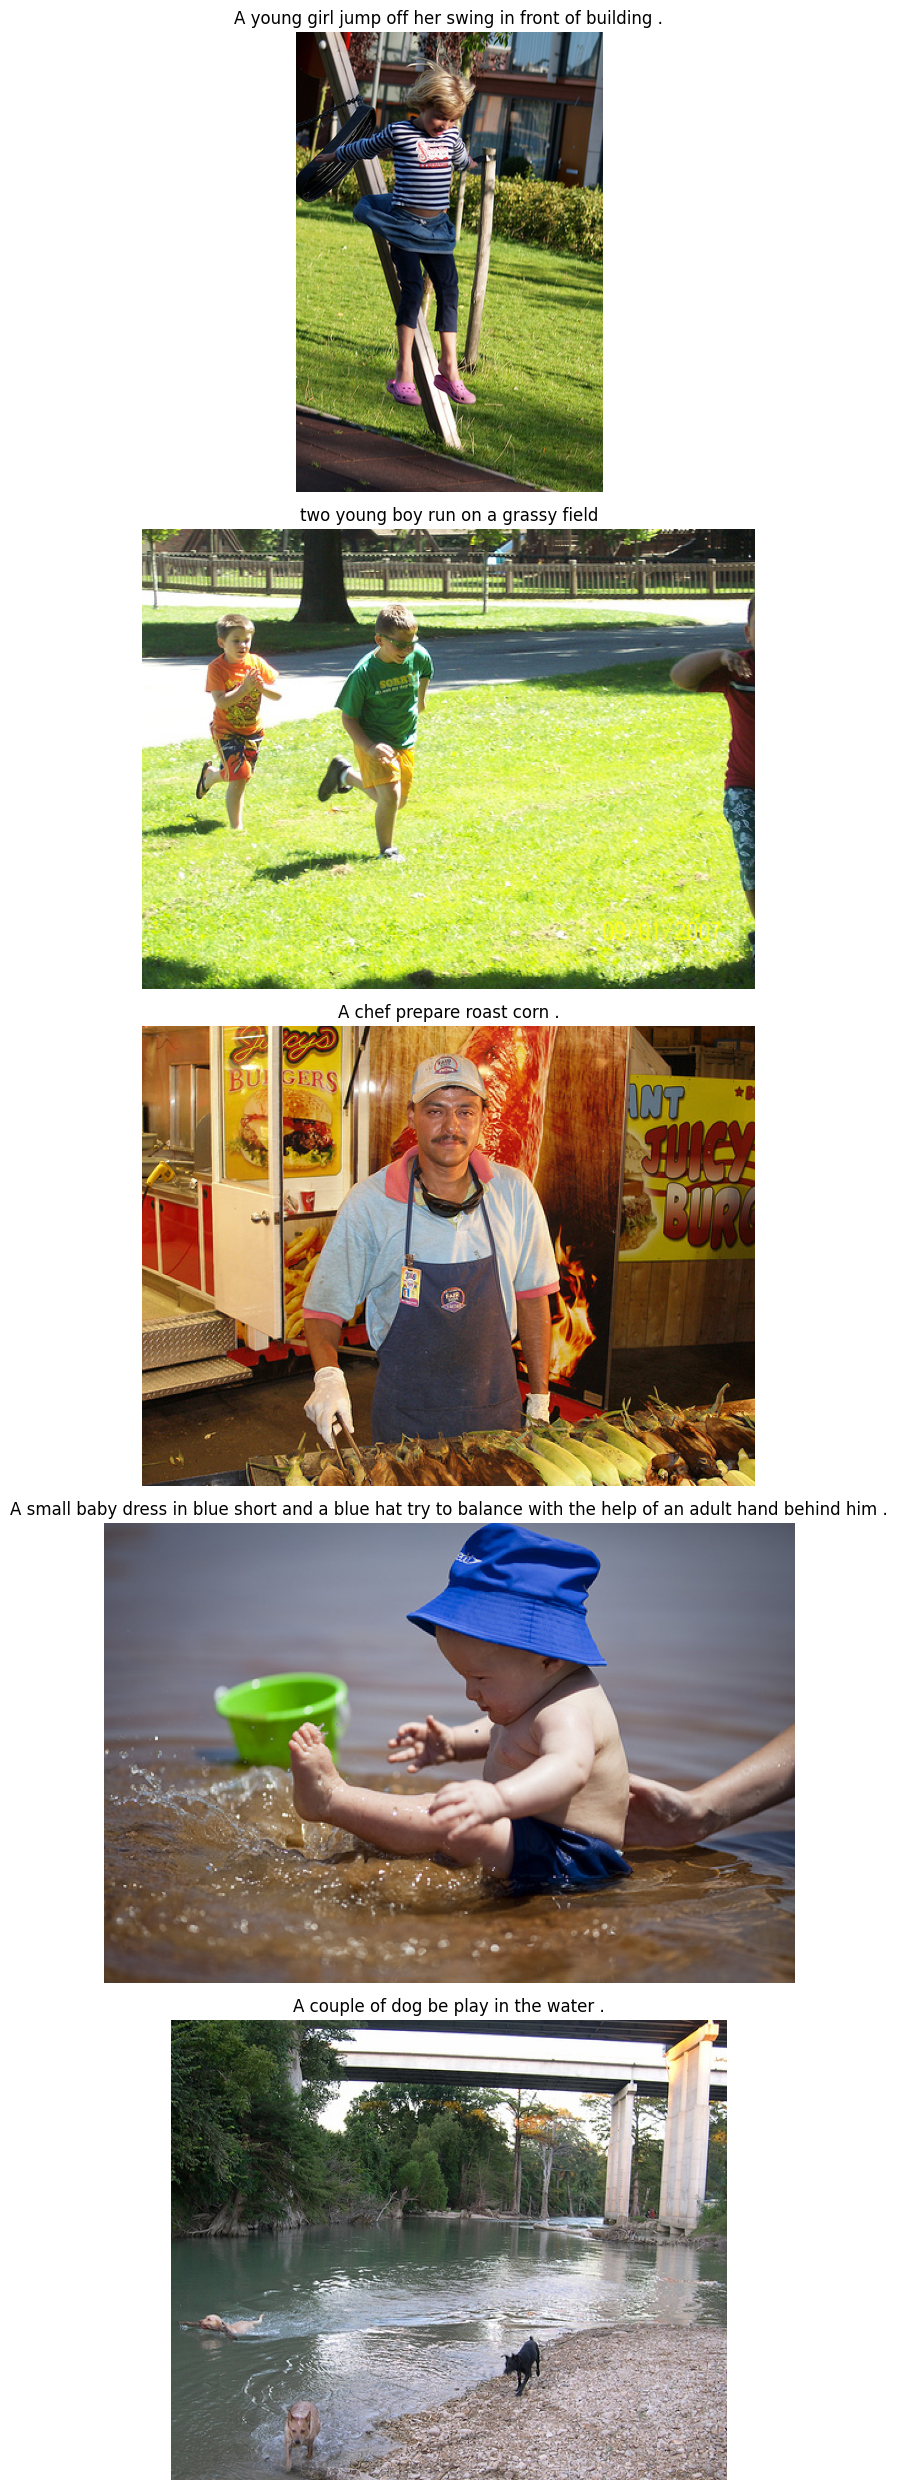

In [ ]:
# Combine modified image names and captions
data = list(zip(modified_image_names, captions))

# Shuffle the data
random.shuffle(data)

# Plot at least five samples
num_samples = 5
plt.figure(figsize=(15, 5*num_samples))
for i in range(num_samples):
    # Get modified image path and caption
    image_name, caption = data[i]
    # Construct the full image path without the #1 suffix
    image_path = image_name
    if '#' in image_name:
        image_path = image_name.split('#')[0]

    # Load and plot image
    plt.subplot(num_samples, 1, i+1)
    image = mpimg.imread(os.path.join(extracted_dir_path, image_path))
    plt.imshow(image)
    plt.axis('off')

    # Add caption as title
    plt.title(caption)

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, regularizers

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16

In [ ]:
import numpy as np

In [ ]:
#Use Pretrained VGG16 for Image Feature Extraction
def get_vgg16_model(input_shape):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False
    return models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D()
    ])

# Step 2: Define the directory containing images
extracted_dir_path = '/content/extracted/Image_Captioning_Dataset'

# Step 3: Load the VGG16 model
input_shape = (224, 224, 3)  # Input shape expected by VGG16
vgg16_model = get_vgg16_model(input_shape)

# Step 4: Initialize lists to store image features and image names
image_features = []
image_names = []

# Step 5: Iterate through images in the directory
for filename in os.listdir(extracted_dir_path):
    if filename.endswith(".jpg"):  # Assuming images are in JPEG format
        image_path = os.path.join(extracted_dir_path, filename)
        img = image.load_img(image_path, target_size=(224, 224))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        features = vgg16_model.predict(img)
        image_features.append(features.flatten())
        image_names.append(filename)

# Step 6: Convert lists to numpy arrays
image_features = np.array(image_features)
image_names = np.array(image_names)

# Step 7: Save the extracted features and image names for later use
np.save('image_features.npy', image_features)
np.save('image_names.npy', image_names)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 21ms/step


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
import pickle

# Open pickle file
with open('/content/drive/MyDrive/ML_FinalProject/setpklfile.pkl', 'rb') as f:
    p_data = pickle.load(f)

# Extract file names and captions from the loaded data
file_list = p_data  # Assuming the pickle file directly contains the list of file names
fileCaption = []  # Initialize an empty list for captions

# Iterate through file_list to separate file names and captions
for entry in file_list:
    # Extract file name and caption
    file_name, caption = entry.split("\t")
    # Append caption to fileCaption list with start and end tokens
    fileCaption.append("<start> " + caption.strip() + " <end>")

fileFeature = []

# Iterate through file_list to match file names with image_names and retrieve corresponding features
for i in range(len(file_list)):
    # Extract file name from file_list
    file_name = file_list[i].split("\t")[0][:-2]  # Assuming file names are formatted with an extension

    # Check if file_name exists in image_names
    if file_name in image_names:
        # Append corresponding feature
        fileFeature.append(image_features[np.where(image_names == file_name)[0][0]])

# Convert lists to arrays
fileFeature = np.array(fileFeature)

# Print sample captions
print(fileCaption[:5])

# Print the shape of the VGG feature array
print("Shape of the VGG feature array:", fileFeature.shape)

# Print the number of captions extracted
print("Number of captions extracted:", len(fileCaption))


['<start> A man in a black hoodie be hold a paper sign . <end>', '<start> Three race dog be run out of the start gate on a track . <end>', '<start> Two motorcycle with two rider each . <end>', '<start> A man on a bike nest to a river . <end>', '<start> A football player try tackle another player who have the ball . <end>']
Shape of the VGG feature array: (24996, 512)
Number of captions extracted: 25000


In [ ]:
# Function to tokenize sentences
def tokenize(sentences):
    """
    This function will also save the tokenizer to convert IDs back to the text.
    """
    # Create tokenizer
    text_tokenizer = Tokenizer()
    # Fit texts
    text_tokenizer.fit_on_texts(sentences)
    return text_tokenizer.texts_to_sequences(sentences), text_tokenizer

# Tokenize all the captions
text_tokenized, text_tokenizer = tokenize(fileCaption)

# Print tokenized sentences
print(text_tokenized[0:5])

# Calculate total vocabulary size
total_vocab = len(text_tokenizer.word_index) + 1
max_sentence_len = int(len(max(text_tokenized, key=len)))

print('Maximum length of sentence is : {}'.format(len(max(text_tokenized, key=len))))
print("Total vocabulary is of {} unique words".format(total_vocab))

# Pad all the tokenized sentences with "0" to make all the sentences of the same length
pad_sentence = pad_sequences(text_tokenized, max_sentence_len, padding="post")

# Reshape padded sentences (The input for LSTMs must be three-dimensional.)
pad_sentence = pad_sentence.reshape(-1, max_sentence_len, 1)

print("Shape of the padded sentences is : " + str(pad_sentence.shape))

print(pad_sentence[0])

[[3, 1, 10, 4, 1, 19, 796, 5, 39, 1, 431, 189, 2], [3, 50, 102, 8, 5, 21, 89, 12, 7, 3, 797, 6, 1, 176, 2], [3, 13, 193, 11, 13, 263, 142, 2], [3, 1, 10, 6, 1, 71, 3200, 24, 1, 225, 2], [3, 1, 122, 63, 185, 453, 73, 63, 237, 93, 7, 41, 2]]
Maximum length of sentence is : 35
Total vocabulary is of 5349 unique words
Shape of the padded sentences is : (25000, 35, 1)
[[  3]
 [  1]
 [ 10]
 [  4]
 [  1]
 [ 19]
 [796]
 [  5]
 [ 39]
 [  1]
 [431]
 [189]
 [  2]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]]


In [ ]:
# Ensure the number of samples is the same for fileFeature and pad_sentence
min_samples = min(fileFeature.shape[0], pad_sentence.shape[0])
fileFeature = fileFeature[:min_samples]
pad_sentence = pad_sentence[:min_samples]

# Split Train and Test data
X_train, X_test, y_train, y_test = train_test_split(fileFeature, pad_sentence, test_size=0.2, random_state=42)

# Print shapes of train and test data
print("Training VGG Feature Shape is      : " + str(X_train.shape))
print("Testing VGG Feature Shape is       : " + str(X_test.shape))
print("Training Encoded Caption Shape is  : " + str(y_train.shape))
print("Testing Encoded Caption Shape is   : " + str(y_test.shape))

Training VGG Feature Shape is      : (19996, 512)
Testing VGG Feature Shape is       : (5000, 512)
Training Encoded Caption Shape is  : (19996, 35, 1)
Testing Encoded Caption Shape is   : (5000, 35, 1)


In [ ]:
def convert_to_tensors(features, captions, batch_size):
    # Ensure that the input to the LSTM model is a tuple ([features, captions], captions)
    dataset = tf.data.Dataset.from_tensor_slices(((features, captions), captions))
    dataset = dataset.cache()
    dataset = dataset.shuffle(1000, reshuffle_each_iteration=True)
    dataset = dataset.batch(batch_size, drop_remainder=True)
    return dataset


batch_size = 128
train = convert_to_tensors(X_train, y_train, batch_size)
test = convert_to_tensors(X_test, y_test, batch_size)

In [ ]:
from tensorflow.keras.layers import Input, RepeatVector, Reshape, LSTM, TimeDistributed, Dense, concatenate, Activation
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
from keras.layers import BatchNormalization, Activation

In [82]:
# Define input shapes
vgg_input_shape = (512,)
caption_input_shape = (35,)

# Define input layers
vgg_input = Input(shape=vgg_input_shape)
caption_input = Input(shape=caption_input_shape)

# Repeat VGG feature vector for each time step of caption
repeated_vgg = RepeatVector(caption_input_shape[0])(vgg_input)

# Reshape caption input to match the shape of VGG feature vector
reshaped_caption_input = Reshape((caption_input_shape[0], 1))(caption_input)

# Concatenate VGG feature vector with each time step of the reshaped caption input
concatenated_input = tf.keras.layers.concatenate([repeated_vgg, reshaped_caption_input], axis=-1)

# LSTM layers with BatchNormalization and dropout
decoder1 = LSTM(512, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(), dropout=0.1)(concatenated_input)
decoder1 = BatchNormalization()(decoder1)
decoder1 = Activation('tanh')(decoder1)

decoder2 = LSTM(512, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(), dropout=0.1)(decoder1)
decoder2 = BatchNormalization()(decoder2)
decoder2 = Activation('tanh')(decoder2)

decoder3 = LSTM(512, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(), dropout=0.3)(decoder2)
decoder3 = BatchNormalization()(decoder3)
decoder3 = Activation('tanh')(decoder3)

# TimeDistributed layer
logits = TimeDistributed(Dense(total_vocab))(decoder3)

# Compile the model
lr_rate = 1e-3
model = Model(inputs=[vgg_input, caption_input], outputs=Activation('softmax')(logits))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr_rate),
              metrics=['accuracy'])
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_41 (InputLayer)       [(None, 512)]                0         []                            
                                                                                                  
 input_42 (InputLayer)       [(None, 35)]                 0         []                            
                                                                                                  
 repeat_vector_8 (RepeatVec  (None, 35, 512)              0         ['input_41[0][0]']            
 tor)                                                                                             
                                                                                                  
 reshape_13 (Reshape)        (None, 35, 1)                0         ['input_42[0][0]']      

In [ ]:
import time

In [83]:
t0 = time.time()
ht = model.fit(train,
               validation_data=test,
               epochs=10,
               shuffle=True,
               verbose=1)
t1 = time.time()

print("Print the total time taken for training", round(t1-t0,3),"seconds")

#The Loss and Accuracy of Test Data is (Plot the graph)
Loss, accuracy = model.evaluate(test, verbose=2)

print("Loss: ", Loss)
print("Accuracy: ", accuracy)

Epoch 1/10
156/156 [==============================] - 24s 111ms/step - loss: 4.7144 - accuracy: 0.7179 - val_loss: 3.1819 - val_accuracy: 0.6641
Epoch 2/10
156/156 [==============================] - 16s 103ms/step - loss: 1.1312 - accuracy: 0.7911 - val_loss: 1.6309 - val_accuracy: 0.7446
Epoch 3/10
156/156 [==============================] - 16s 103ms/step - loss: 0.9798 - accuracy: 0.8094 - val_loss: 1.0650 - val_accuracy: 0.7829
Epoch 4/10
156/156 [==============================] - 16s 105ms/step - loss: 0.9461 - accuracy: 0.8178 - val_loss: 0.9882 - val_accuracy: 0.8029
Epoch 5/10
156/156 [==============================] - 17s 106ms/step - loss: 0.8504 - accuracy: 0.8285 - val_loss: 0.8287 - val_accuracy: 0.8260
Epoch 6/10
156/156 [==============================] - 17s 109ms/step - loss: 0.7917 - accuracy: 0.8361 - val_loss: 0.8154 - val_accuracy: 0.8238
Epoch 7/10
156/156 [==============================] - 18s 115ms/step - loss: 0.7760 - accuracy: 0.8380 - val_loss: 0.8471 - val_ac

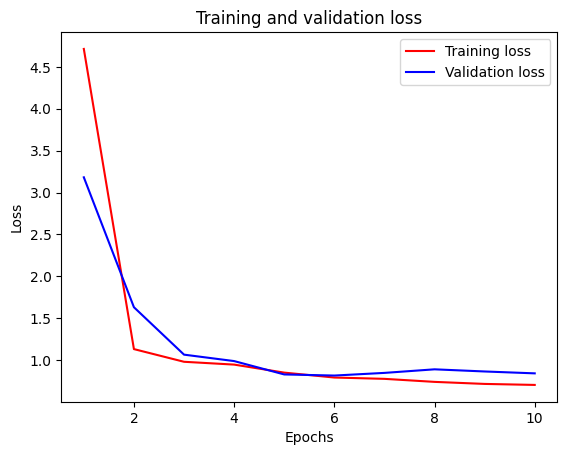

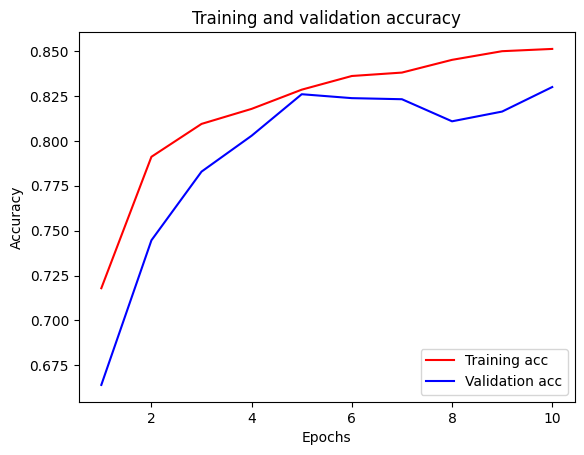

In [84]:
history_dict = ht.history
history_dict.keys()
acc = history_dict['accuracy']
loss = history_dict['loss']
val_acc  = history_dict['val_accuracy']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [85]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_41 (InputLayer)       [(None, 512)]                0         []                            
                                                                                                  
 input_42 (InputLayer)       [(None, 35)]                 0         []                            
                                                                                                  
 repeat_vector_8 (RepeatVec  (None, 35, 512)              0         ['input_41[0][0]']            
 tor)                                                                                             
                                                                                                  
 reshape_13 (Reshape)        (None, 35, 1)                0         ['input_42[0][0]']      

In [86]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.layers import GlobalAveragePooling2D

In [87]:

# Load and preprocess the image
image_path = '/content/trialimg.jpg'
img_ori = cv2.imread(image_path)
img = cv2.resize(img_ori, (224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Extract features using the VGG16 model
feature = vgg_model.predict(x)

# Average pooling to reduce the spatial dimensions to 1x1
pooled_feature = GlobalAveragePooling2D()(feature)

# Reshape to match the expected size by the model
reshaped_feature = Reshape((512,))(pooled_feature)

# Ensure the shape of reshaped_feature is correct
print("Shape of reshaped_feature:", reshaped_feature.shape)

# Generate caption prediction
predicted_sentence = logits_to_sentence(model.predict([reshaped_feature, np.zeros((1, max_sentence_len))])[0], text_tokenizer)

# Print the predicted sentence
print('The predicted sentence is:')
print(predicted_sentence)

1/1 [==============================] - 0s 18ms/step
Shape of reshaped_feature: (1, 512)
1/1 [==============================] - 1s 1s/step
The predicted sentence is:
start a man be a <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty>


In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

In [ ]:
# Load InceptionV3 model
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))


87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# Load and resize input image
img_ori = cv2.imread(image_path)
img = cv2.resize(img_ori, (299, 299))

# Convert image to array and preprocess
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Pass preprocessed image to the model for prediction
feature = inception_model.predict(x)

# Modify the input shape for the LSTM model
inception_input_shape = feature.shape[1:]

1/1 [==============================] - 3s 3s/step


In [ ]:
# Step 2: Extract features from images
def extract_features(image_paths):
    features = []
    for image_path in image_paths:
        img = image.load_img(image_path, target_size=(224, 224))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        feature = xception_model.predict(img)
        features.append(feature)
    return np.array(features)


In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from keras.layers import Input, LSTM, Dense, Activation, Flatten, RepeatVector, Reshape
from keras.models import Model
import tensorflow as tf

In [ ]:
# Define input shapes
inception_input_shape = (299, 299, 3)  # Modified to specify 3 channels
caption_input_shape = (35,)

# Load InceptionV3 model without top layers
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=inception_input_shape)


# Load InceptionV3 model without top layers
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=inception_input_shape)

# Define input layers
inception_input = Input(shape=inception_input_shape)
caption_input = Input(shape=caption_input_shape)

# Extract features from InceptionV3 model
feature = inception_model(inception_input)

# Flatten the Inception features
flattened_features = Flatten()(feature)

# Repeat flattened Inception feature vector for each time step of caption
repeated_inception = RepeatVector(caption_input_shape[0])(flattened_features)

# Reshape caption input to match the shape of Inception feature vector
reshaped_caption_input = Reshape((caption_input_shape[0], 1))(caption_input)

# Concatenate flattened Inception feature vector with each time step of the reshaped caption input
concatenated_input = tf.keras.layers.concatenate([repeated_inception, reshaped_caption_input], axis=-1)

# LSTM layers
decoder1 = LSTM(512, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(), dropout=0.3)(concatenated_input)
decoder2 = LSTM(512, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(), dropout=0.3)(decoder1)
decoder3 = LSTM(512, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(), dropout=0.3)(decoder2)

# TimeDistributed layer
logits = TimeDistributed(Dense(total_vocab))(decoder3)

# Define and compile the model
lr_rate = 1e-3
model = Model(inputs=[inception_input, caption_input], outputs=Activation('softmax')(logits))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr_rate),
              metrics=['accuracy'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_67 (InputLayer)       [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 inception_v3 (Functional)   (None, 8, 8, 2048)           2180278   ['input_67[0][0]']            
                                                          4                                       
                                                                                                  
 flatten_2 (Flatten)         (None, 131072)               0         ['inception_v3[0][0]']        
                                                                                                  
 input_68 (InputLayer)       [(None, 35)]                 0         []                      

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Preprocess the input images
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

Epoch 1/10
156/156 [==============================] - 23s 114ms/step - loss: 4.9862 - accuracy: 0.6643 - val_loss: 1.9942 - val_accuracy: 0.6977
Epoch 2/10
156/156 [==============================] - 17s 109ms/step - loss: 1.9009 - accuracy: 0.7023 - val_loss: 1.7917 - val_accuracy: 0.7079
Epoch 3/10
156/156 [==============================] - 17s 112ms/step - loss: 1.7487 - accuracy: 0.7128 - val_loss: 1.5900 - val_accuracy: 0.7306
Epoch 4/10
156/156 [==============================] - 16s 103ms/step - loss: 1.6096 - accuracy: 0.7234 - val_loss: 1.5183 - val_accuracy: 0.7329
Epoch 5/10
156/156 [==============================] - 16s 103ms/step - loss: 1.5666 - accuracy: 0.7262 - val_loss: 1.4526 - val_accuracy: 0.7339
Epoch 6/10
156/156 [==============================] - 17s 107ms/step - loss: 1.5436 - accuracy: 0.7292 - val_loss: 1.4226 - val_accuracy: 0.7372
Epoch 7/10
156/156 [==============================] - 17s 106ms/step - loss: 1.5278 - accuracy: 0.7309 - val_loss: 1.4003 - val_ac

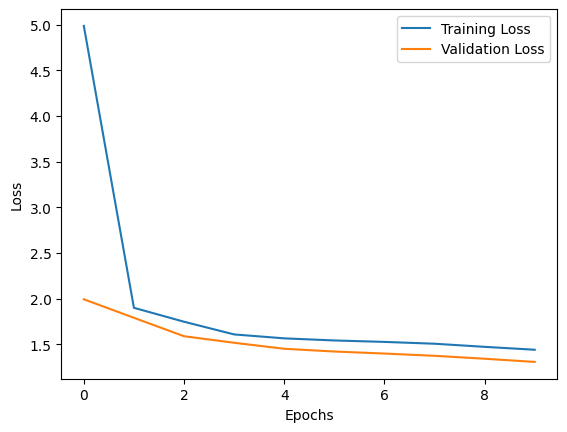

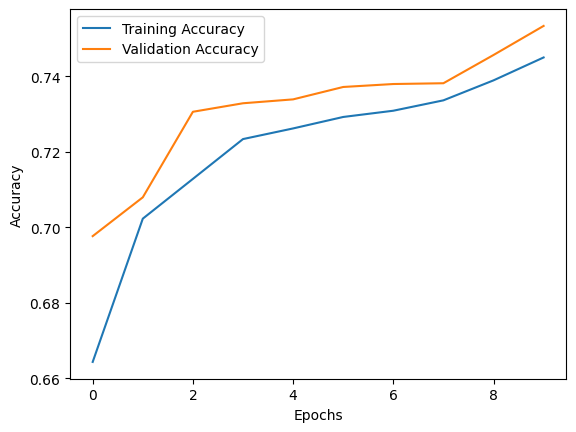

39/39 - 2s - loss: 1.3090 - accuracy: 0.7533 - 2s/epoch - 39ms/step
Loss: 1.3089845180511475
Accuracy: 0.7533138990402222


In [ ]:
t0 = time.time()
history = model.fit(train,
                    validation_data=test,
                    epochs=10,
                    shuffle=True,
                    verbose=1)
t1 = time.time()

print("Total time taken for training:", round(t1 - t0, 3), "seconds")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(test, verbose=2)

print("Loss:", loss)
print("Accuracy:", accuracy)